"""
There are few libraries in python for doing time series modelling.

StatsModels : This is useful for doing statistical modelling and also contains functions for time-series modelling .
 see Time Series analysis for detailed documentation.
Prophet : It is a open-source library by facebook for forecasting available in R and Python. see Quick Start for more 
details.
PyFlux : It seems to me the most comprehensive library for time series prediction. It as API’s for advanced models like
 
 ARIMAX, GARCH, VAR, DAR etc
If you want to apply deep learning for time series modelling you can use popular DL libraries like Keras, 
TensorFlow to implement them. See Multivariate Time Series Forecasting with LSTMs in Keras for a tutorial on it.

"""

In [7]:
import numpy as np
import os, sys
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from datetime import timedelta
import pandas as pd
sys.path.insert(0, os.path.abspath('../../covid_forecast'))
from covid_forecast.utils.data_io import get_data, download_the_data
from covid_forecast.utils.visualizations import plt_arima_forecast,plt_arima_forecast_outsample, render_pic_in_notebook

In [8]:
OUTPUT = '../outputs/var'
os.makedirs(OUTPUT,exist_ok=True)

In [9]:
download_the_data()

href="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-24.xlsx"


In [42]:
data = get_data()

In [43]:
data['Countries and territories'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra', 'Argentina',
       'Armenia', 'Antigua_and_Barbuda', 'Algeria', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia_and_Herzegovina', 'Brazil',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Cambodia',
       'Cameroon', 'Canada', 'CANADA', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czech_Republic', 'Democratic_Republic_of_the_Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe_Islands', 'Fiji', 'Finland',
       'France', 'French_Polynesia', 'Gabon', 'G

In [87]:
country = 'South_Korea'
variable = 'Cases'
variables = ['Cases', 'Deaths']
variables_date = ['Cases', 'Deaths','DateRep']

In [88]:
data_ = data[data['Countries and territories'] == country].copy()
data_ = data_.sort_values(by='DateRep')
# Triming initial zeros
remove_initia_zeros = np.trim_zeros(data_[variable]).__len__()
# y = data_[variable][0:remove_initia_zeros]
y = data_[variables_date][-remove_initia_zeros:]
data_labels = data_['DateRep'][-remove_initia_zeros:]

In [89]:
y

,Cases,Deaths,DateRep
5575,1,0,2020-01-20
5574,0,0,2020-01-21
5573,0,0,2020-01-22
5572,0,0,2020-01-23
5571,1,0,2020-01-24
...,...,...,...
5515,87,9,2020-03-20
5514,147,3,2020-03-21
5513,98,1,2020-03-22
5512,64,9,2020-03-23


In [90]:
y.set_index('DateRep')
y[variables] = y[variables].astype(float)

In [91]:
# make a VAR model
model = VAR(y[variables].values)
results = model.fit(2)

In [92]:
results.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 24, Mar, 2020
Time:                     20:03:52
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    10.8346
Nobs:                     63.0000    HQIC:                   10.6282
Log likelihood:          -499.360    FPE:                    36136.8
AIC:                      10.4944    Det(Omega_mle):         31017.9
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        21.075412        14.760635            1.428           0.153
L1.y1         0.632652         0.124917            5.065           0.000
L1.y2        -1.807617         5.489466           -0.329           0.742
L2.y1         0.349012

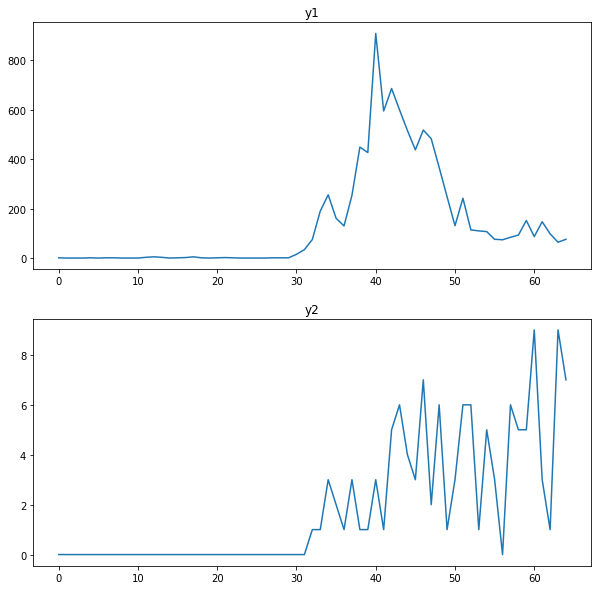

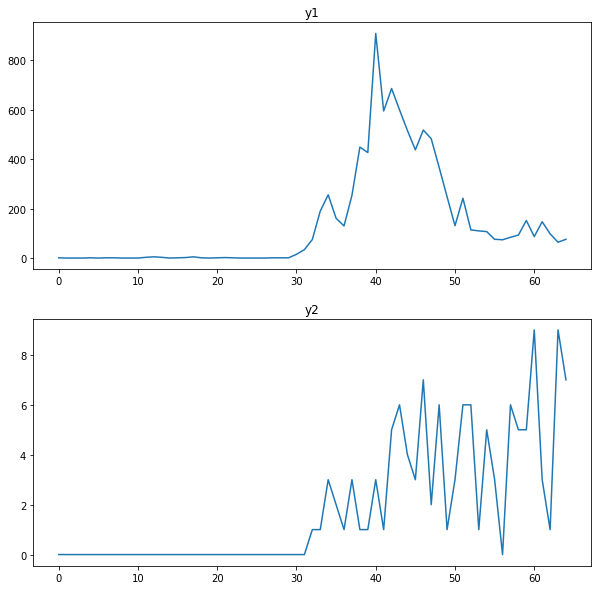

In [93]:
results.plot()

In [94]:
print(model.select_order(15))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 15, BIC -> 15, FPE -> 15, HQIC -> 15>


In [95]:
results = model.fit(maxlags=15, ic='aic')
lag_order = results.k_ar


In [96]:
results.forecast(y.values[-lag_order:], 5)

ValueError: shapes (2,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

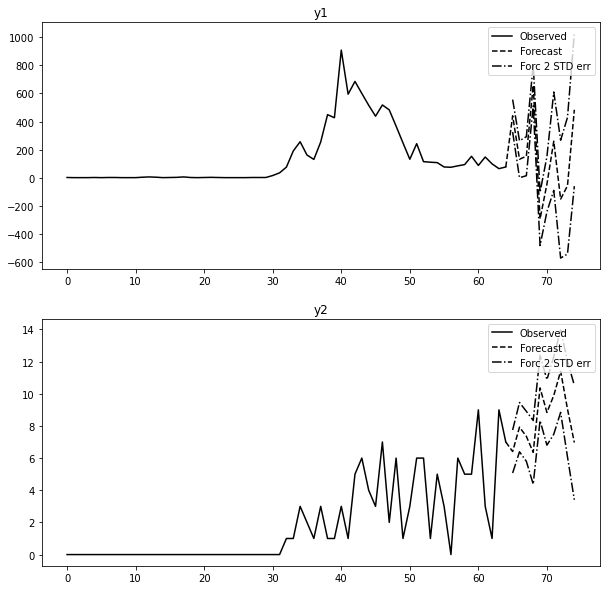

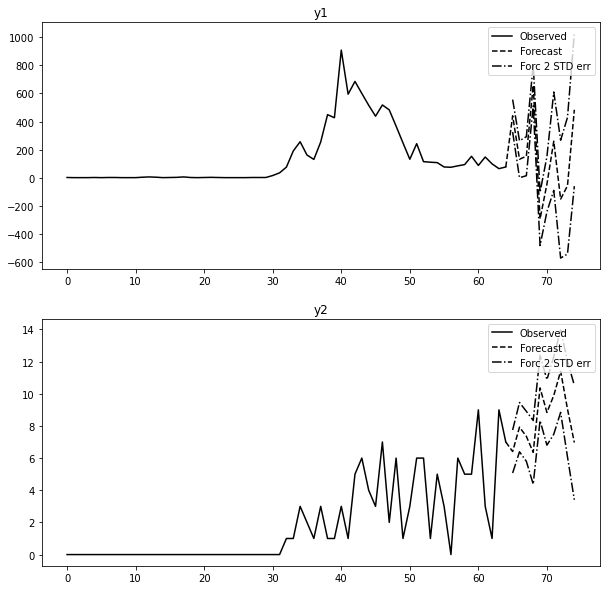

In [97]:

results.plot_forecast(10)